In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math

# Learning Logistic Regression

## STOP!  Please Read "Learning Linear Regression" First

This example uses logistic regression with batch gradient descent to classify species of Iris given their sepal length, sepal width, petal length, and petal width.

In general, our goal with logistic regression is to fit a linear function to our features so that we can learn some function $g(x)$ that can predict a binary class membership probability given a set of independent variables, by learning 'weights'.  

To create this function $g(x)$ we can modify the linear regression formula we've previously used so that the output is constrained between the values of 0 and 1.  To do so we simply need to wrap the linear function in another function called sigmoid.

$sigmoid(f(x) = \theta_{0} + \theta_{1}*X_{1} + \theta_{2}*X_{2} + … + \theta_{n}*X_{n})$


The sigmoid function is defined as:

$sigmoid = \frac{1}{1 + e^{-z}}$ where z is our original linear function, defined above as f(x)


## Let's take a second to explore sigmoid

In [79]:
def sigmoid(z):
    y = 1 / (1 + math.e ** -z)
    return y

In [80]:
demo_list = np.arange(-10, 11, 1)  # creates array [-10, 9, .., 9, 10]
out = [sigmoid(x) for x in demo_list]

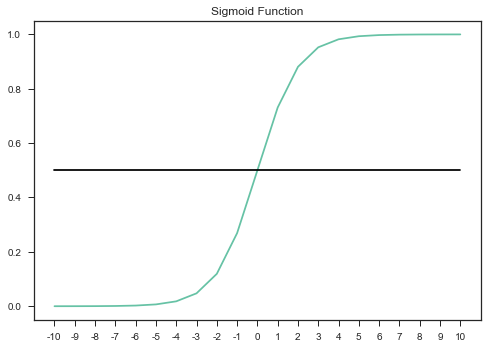

In [81]:
plt.xticks(np.arange(21), demo_list)
plt.plot(out)
plt.plot([0,20], [.5,.5], color='black', label="x")
plt.title("Sigmoid Function")
plt.show()

So, we can see that regardless of the size of input, sigmoid squeezes the output to 0 or 1.

# Loading the IRIS Dataset

There are three classes of iris present in the iris dataset (setosa', 'versicolor', 'virginica'). 

We aren't quite ready to talk about multiclass classification yet, so let's reframe this problem so that we have a binary classification problem instead.  We will do this by throwing away the third class for now, so that we're predicting either Setosa or Versicolor.

We're also going to make the problem slightly easier by only looking at sepal length and width.   Feel free to modify this notebook and add petal length and width back in.

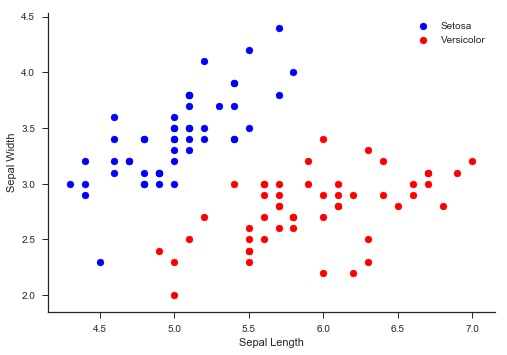

In [82]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

First, we're going to split our array into y, the variable we want to predict (species)
and X, the array of independent variables we're going to train on.

If you recall from above, our linear equation included an intercept term $\theta_{0}$ that isn't present in our training data X, so we'll need to add it.   By convention we set $\theta_{0}$ to 1.



In [83]:
y = y.T #we just prefer y to be a column vector instead of a row vector.

#get the number of training samples in X
m = y.size
#Add a column of ones, size m, to X (intercept term)
it = np.ones(shape=(m, 1))
X = np.append(it,X,1)


# Building a Test Set

One of the best ways to measure a model's performance is to use a test dataset.  In this example, we will take a 25% random sample of the data to hold out in order to measure model performance.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 3)
(25, 3)
(75,)
(25,)


# Cost Function

The purpose of this function is to show us how accurate our $\theta$s are. We will define a cost function, $J(\theta)$ as a goodness of fit metric.  Our goal is to minimize this function.  When our model is very accurate (the predicted value is very close to the actual value) $J(\theta)$ will become very small.   

In a machine learning logistic regression model, the cost is typically defined as:

$$J(\theta) = -\sum_{i=1}^{m}y_{i}log(g(x_{i})) + (1-y_{i})log(1-g(x_{i}))$$

A really intuitive derivation of this cost function can be [found here.](http://nbviewer.jupyter.org/github/tfolkman/learningwithdata/blob/master/Logistic%20Gradient%20Descent.ipynb)




In [86]:
def logit(theta, x):
    """
    Logistic model:  Returns logistic outputs given an array theta and a matrix of inputs X
    """
    return float(1) / (1 + math.e**(-x.dot(theta)))

In [87]:
def cost_func( X, y, theta):
    logit_output = logit(theta,X)
    y = np.squeeze(y)
    cost_class_1 = y * np.log(logit_output)  #if y = 0, this will be 0
    cost_class_0 = (1-y) * np.log(1 - logit_output) # if y = 1, this will be 0.  Cool right?
    return np.sum(-cost_class_1 - cost_class_0)

# Gradient Descent

Now that we have a cost function that can estimate the correctness of our current values of $\theta$, all we have to do is minimize that error rate J by picking the best possible values of $\theta$ we can based on our training data.

To do that, we'll use an optimization algorithm known as 'batch gradient descent.'

On the surface, batch gradient descent is pretty easy:

Repeat Until Converged: {
$$\theta = \theta-\alpha\frac{\partial}{\partial\theta}J(\theta)$$
}

So, every time we update theta, we will set theta equal to the previous value minus $\alpha$ (a learning rate) multiplied by the partial derivative of the cost function J, with respect to $\theta$

So then if we start with:

$$\theta:=\theta-\alpha\frac{\partial}{\partial\theta}J(\theta)$$
We can substitute the cost function for J, work through the partial derivative, and come to find that the update rule for a single iteration is:
$$\theta = \theta + \alpha  \sum_{i=1}^{m} (g(x^{i}) - y^{i})x^{i} $$
Which is what we've implemented below.   



In [88]:
def gradient_descent(X, y, theta, alpha, num_iters):
   
    m = y.size
    J_history = []
 
    for i in range(num_iters):
        gradient = (logit(theta, X) - y ).T.dot(X)
        theta =  theta - (alpha * gradient)
        J_history.append(cost_func(X, y, theta))
    return theta, J_history

## Finding our $\theta$s

Now that we've implemented these functions, we can pass X (our training data), y (our dependat variable, house price), alpha, and iterations to the gradient_descent function to learn values for $\theta$

We've set $\alpha$ to .01, which is a commonly used good start.  We've set iterations to 1000, which should be more than enough in this case.  A more sophisticated approach would be to repeat until J stops changing significantly (i.e. converges).

In [98]:
print(y.shape)
print(np.zeros((X.shape[1])))

(100,)
[ 0.  0.  0.]


In [99]:
alpha = .001
iterations = 1000
theta = np.zeros((X.shape[1]))
theta, J_history = gradient_descent(X_train,y_train,theta,alpha, iterations)


In [100]:
theta

array([-0.58944209,  2.68366918, -4.54682201])

## Tuning Gradient Descent

We can adjust $\alpha$, the learning rate, and iterations, the number of times gradient descent loops to make gradient descent run better.   Let's try some different values.

In [101]:
%matplotlib inline

from pylab import *
def plot_grad_descent(alpha, iterNum):
    theta = np.zeros((X.shape[1]))#reinitialize theta
    theta, J_history = gradient_descent(X, y,theta, alpha, iterNum)
    plot(J_history)
    title("alpha = " +str(alpha)+ "; iterations = " +str(iterNum))
    show()


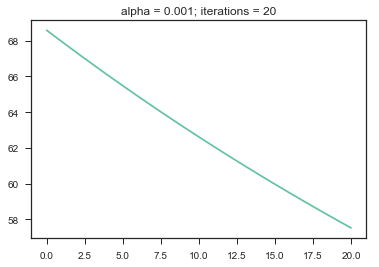

In [102]:
plot_grad_descent(.001,20)

In this graph we can see that $J(\theta)$ is decreasing as iterations increases, which is expected.   While $J(\theta)$ is beginning to stabilize, we probably need more iterations before it becomes stable.   Lets try 100.

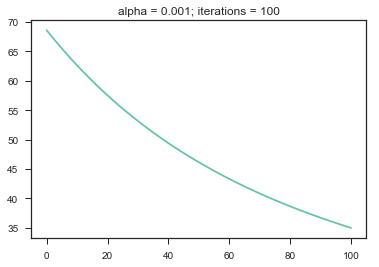

In [103]:
plot_grad_descent(.001,100)

In this graph we can see $J(\theta)$ has become very small and begins to approach 0 asymptotically as $J(\theta)$ approaches infinity.  Lets further prove that point.

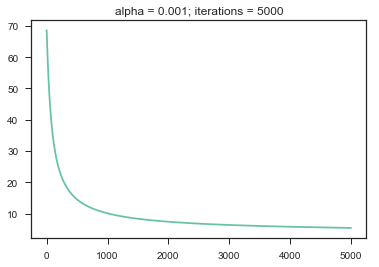

In [104]:
plot_grad_descent(.001,5000)

Here we can see $J(\theta)$ over 5000 iterations.  

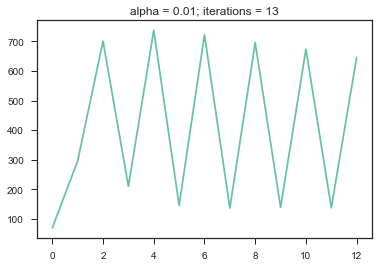

In [96]:
plot_grad_descent(.01,13)

This last graph is an example of what would happen if we set alpha too large.   In this case gradient descent it taking steps that are too large.   When that happens, $J(\theta)$ will 'miss' the minimum and will begin bouncing around, past the minimum in each direction.

# Tweaking Gradient Descent For Early Stopping

As you might have noticed, after a few iterations our problem is about as solved as it's going to get.   One way we can make our gradient descent implementation better is by stopping when we're converged instead of going for all the specified iterations.  Lets do that here...

In [105]:
def gradient_descent(X, y, theta, alpha=.01, num_iters=1000, tol=1e-5):
   
    J_history = [] # a column vec to hold our previous Js
    i=0
    old_cost = 0
    change_cost = 1
    
    while (change_cost > tol):

        gradient = (logit(theta, X) - y ).T.dot(X)
        theta =  theta - (alpha * gradient)
        cost = cost_func(X, y, theta)
        J_history.append(cost)
        change_cost = np.abs(cost-old_cost)
        old_cost = cost
        i+=1
        if (i > num_iters):
            break        
    return theta, J_history

In [106]:
alpha = .001
iterations = 1000
#np.shape[1] is the number of features, so we need an equal # of thetas
theta = np.zeros((X.shape[1]))

theta, J_history = gradient_descent(X_train,y_train,theta,alpha, iterations, tol=1e-4)

# Making a Prediction

Now that we have some learned weights for our function, we can use them to make a prediction.  In X_test we have 25 observations that our model has never seen.  Lets see if it can predict "Versicolor."



In [114]:
theta

array([-0.58944209,  2.68366918, -4.54682201])

In [108]:
logit(theta, X_test)

array([ 0.25351943,  0.03451861,  0.97880832,  0.84944001,  0.78804165,
        0.20614909,  0.99297073,  0.91460566,  0.14891471,  0.08612264,
        0.0672142 ,  0.9369924 ,  0.96771256,  0.97668938,  0.08788699,
        0.74402717,  0.06355824,  0.17732   ,  0.66693961,  0.03957277,
        0.94713675,  0.07254485,  0.04042567,  0.68968334,  0.56510464])

# So, how good it is?

There are a few ways to measure good in binary classifiers.  The We use analytics to grow our business and develop new ways of doing business.
 is to just compare the number of predicted 1s vs the actual 1s.  This is called accuracy and if you've ever taken a test you're probably familiar with the concept.

In [109]:
y_hat = logit(theta, X_test)

In [110]:
y_hat  # note, these are probabilities.  

array([ 0.25351943,  0.03451861,  0.97880832,  0.84944001,  0.78804165,
        0.20614909,  0.99297073,  0.91460566,  0.14891471,  0.08612264,
        0.0672142 ,  0.9369924 ,  0.96771256,  0.97668938,  0.08788699,
        0.74402717,  0.06355824,  0.17732   ,  0.66693961,  0.03957277,
        0.94713675,  0.07254485,  0.04042567,  0.68968334,  0.56510464])

In [111]:
#Lets convert to class predictions
y_hat = np.round(y_hat)

In [112]:
def accuracy(y_hat, y):
    """
    A simple vectorized way to compute accuracy - total observations - incorrect observations / total observations
    """
    return (y_test.shape[0] - np.count_nonzero(y_test - y_hat)) / y_test.shape[0] * 100

In [113]:
print("Accuracy is: ",accuracy(y_hat, y), "%")

Accuracy is:  100.0 %


# Wrapping Up

We can use the same process we used for linear regression to solve binary classification problems.  The general process is:

* Define a model
* Identify a cost function
* Calculate a gradient
* Randomly initialize model weights
* Optimize model weights by looping updates on the gradient given the training data (gradient descent)

This same flow can be used for many different model types.



Our model does pretty well, correctly classifying the species of iris 96% of the time. 

Accuracy isn't a great metric, but for this dataset it works pretty well.  We will talk more about metrics selection later. 

